In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import math
def my_fun(x, x1, x2):
    return 1/(1 + np.exp(-x1*(x-x2)))


In [4]:
BA2 = pd.read_excel('BA2.xlsx')

In [5]:
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [6]:
ydata = BA2['prev'].to_numpy()
xdata = BA2['days'].to_numpy()

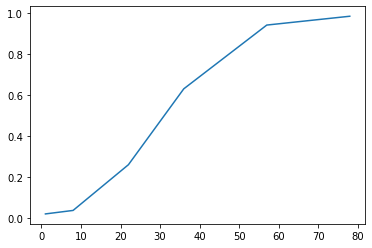

In [7]:
plt.plot(xdata, ydata)

In [8]:
popt, pcov = curve_fit(my_fun, xdata, ydata, p0 = [0.1, 10], bounds = ([0, 0], [1000, 30]))

In [9]:
X = np.linspace(0, 100, 100)
Y = my_fun(X, popt[0], popt[1])

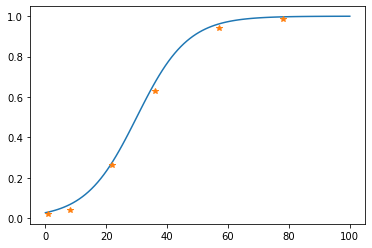

In [10]:
plt.plot(X,Y)
plt.plot(xdata,ydata, '*')

In [11]:
Y = np.savetxt('BA2.txt', Y)

In [12]:
BA12 = pd.read_excel('BA12.xlsx')

In [13]:
ydata2 = BA12['prev'].to_numpy()
xdata2 = BA12['days'].to_numpy()

In [14]:
popt2, pcov2 = curve_fit(my_fun, xdata2, ydata2, p0 = [0.1, 10], bounds = ([0, 0], [100000, 3000]))

In [15]:
X2 = np.linspace(0, 200, 200)
Y2 = my_fun(X2, popt2[0], popt2[1])

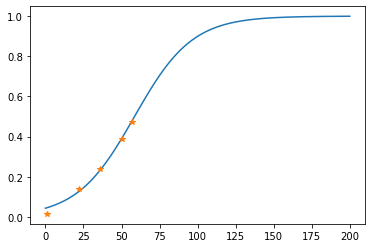

In [16]:
plt.plot(X2,Y2)
plt.plot(xdata2,ydata2, '*')

In [33]:
Y2 = np.savetxt('BA12.txt', Y2)

In [22]:
var = pd.read_excel('var.xlsx')

In [40]:
import datetime
var['date2'] = var['date'] + datetime.timedelta(days = 8)
#my_date = datetime.datetime(2022, 2, 28, 0, 0, 0) 
#my_date_days = my_date + datetime.timedelta(days = 161)
#ss = my_date_days.strftime('%m/%d')

In [41]:
var

,date,ba2,ba12,ba22,ba122,date2
0,2022-02-21,0.076036,0.0,NaN,NaN,2022-03-01
1,2022-02-22,0.084958,0.0,NaN,NaN,2022-03-02
2,2022-02-23,0.094819,0.0,NaN,NaN,2022-03-03
3,2022-02-24,0.105693,0.0,NaN,NaN,2022-03-04
4,2022-02-25,0.117651,0.0,NaN,NaN,2022-03-05
...,...,...,...,...,...,...
237,2022-10-16,1.000000,1.0,NaN,NaN,2022-10-24
238,2022-10-17,1.000000,1.0,NaN,NaN,2022-10-25
239,2022-10-18,1.000000,1.0,NaN,NaN,2022-10-26
240,2022-10-19,1.000000,1.0,NaN,NaN,2022-10-27


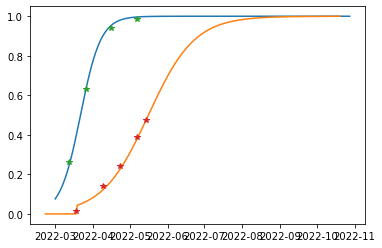

In [42]:
plt.plot(var['date2'] , var['ba2'])
plt.plot(var['date'], var['ba12'])
plt.plot(var['date'], var['ba22'], '*')
plt.plot(var['date'], var['ba122'], '*')

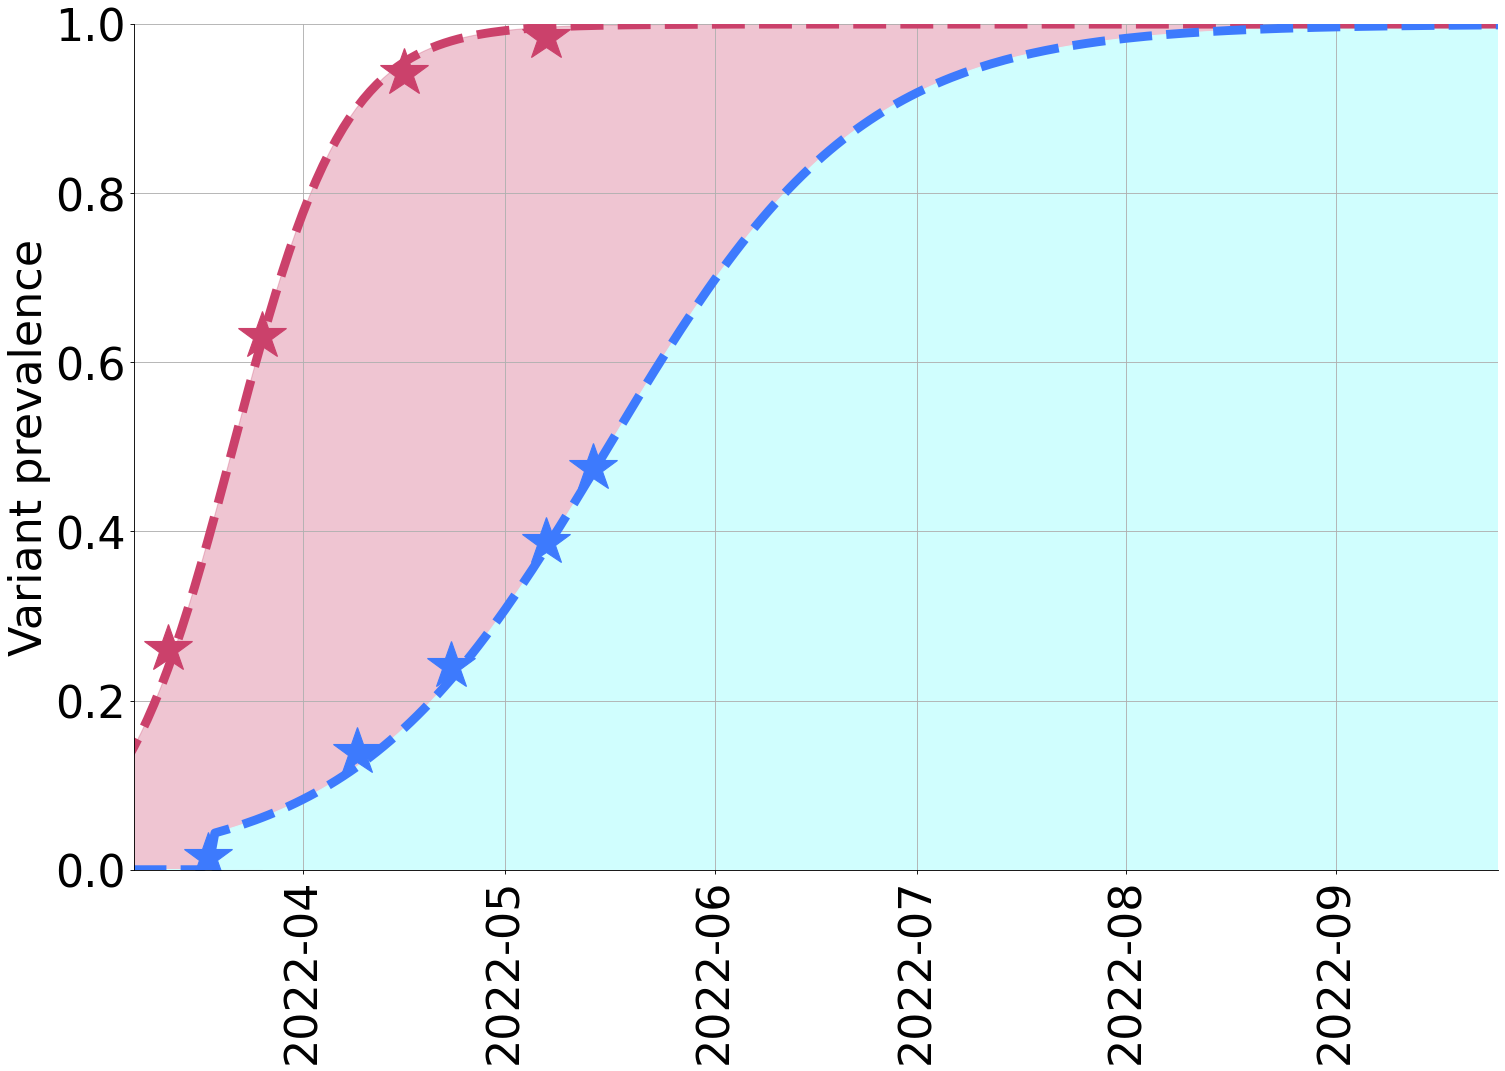

In [96]:
drange1 = pd.date_range("2022-02-21", periods=90, freq="1D")
drange2 = pd.date_range("2021-12-01", periods=60, freq="1D")
drange3 = pd.date_range("2021-12-01", periods=180, freq="1D")

fig = plt.figure(num=None, figsize=(22, 14), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 40})





#plt.plot(x, y, lw = 8, color='xkcd:dark pink', label = 'Texas')

plt.plot(var['date2'] , var['ba2'], '--', lw = 8, color='xkcd:dark pink', label = 'BA.2')
plt.plot(var['date'], var['ba12'], '--', lw = 8, color='xkcd:lightish blue', label = 'BA.2.12.1')
plt.plot(var['date'], var['ba22'], '*', color='xkcd:dark pink' ,markersize=45)
plt.plot(var['date'], var['ba122'], '*', color='xkcd:lightish blue', markersize=45)


plt.fill_between(var['date2'], var['ba12'], var['ba2'], color='xkcd:dark pink', alpha=0.3)


plt.fill_between(var['date'], 0, var['ba12'], color='xkcd:pale blue', alpha=1)


#plt.plot(xdata, ydata, 'k*', markersize=45)


plt.ylabel('Variant prevalence', fontsize = 40)
#plt.legend(fontsize = 45)
#drange1[::7], 

plt.xticks( rotation=90)  
plt.ylim([0, 0.99])
plt.axis([19058, 19260, 0, 1])
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)